<a href="https://colab.research.google.com/github/joisscamargo2805-coder/netflixdb/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Grupo 6
*   MATRÍCULA: 

En esta actividad trabajarás con el archivo `computer_prices.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de computadoras portátiles y de escritorio, disponible en Kaggle.

Los datos fueron recopilados para analizar el rendimiento y el precio de los dispositivos, e incluyen información sobre hardware, almacenamiento, conectividad y otras especificaciones técnicas. Los indicadores incluidos son:

* `device_type`: Tipo de dispositivo (ej. laptop, desktop)
* `brand`: Marca del dispositivo
* `model`: Modelo del dispositivo
* `release_year`: Año de lanzamiento del dispositivo
* `os`: Sistema operativo instalado
* `form_factor`: Factor de forma o diseño del dispositivo (ej. laptop, ultrabook, desktop tower)
* `cpu_brand`: Marca del procesador
* `cpu_tier`: Nivel o gama del procesador, ordinal del 1 al 6 según desempeño
* `cpu_cores`: Número de núcleos del procesador
* `cpu_threads`: Número de hilos de ejecución del procesador
* `gpu_brand`: Marca de la tarjeta gráfica
* `gpu_model`: Modelo específico de la tarjeta gráfica
* `gpu_tier`: Nivel o gama de la GPU, ordinal del 1 al 6 según desempeño
* `vram_gb`: Memoria de video de la GPU en gigabytes
* `ram_gb`: Memoria RAM del dispositivo en gigabytes
* `storage_type`: Tipo de almacenamiento (ej. HDD, SSD)
* `storage_gb`: Capacidad de almacenamiento en gigabytes
* `storage_drive_count`: Número de unidades de almacenamiento instaladas
* `display_type`: Tipo de pantalla (ej. IPS, TN, OLED)
* `charger_watts`: Potencia del cargador (en watts) para laptops
* `psu_watts`: Potencia de la fuente de poder (en watts) para desktops
* `wifi`: Estándar de conectividad Wi-Fi (ej. Wi-Fi 5, 6, 6E, 7)
* `bluetooth`: Versión de Bluetooth
* `weight_kg`: Peso del dispositivo en kilogramos
* `warranty_months`: Meses de garantía del dispositivo
* `price`: Precio del dispositivo. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [16]:
# Instalar las bibliotecas necesarias
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy.stats import probplot
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.binary import BinaryEncoder

1. Descarga el archivo: `computer_prices.csv` y guarda, en un dataframe (`compu_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
* Elimina las variables:
  * `model`: Debido a su altísima cardinalidad, lo que dificulta su uso en análisis y modelado.
  * `cpu_model`: Además de su elevada cardinalidad, su información ya está representada de manera implícita en otras variables como: `cpu_tier`, `cpu_cores` y `cpu_threads`

In [17]:
import pandas as pd
import numpy as np # Adding numpy as it's used later in the cell for select_dtypes

compu_df = pd.read_csv('computer_prices.csv')

print("Información del DataFrame compu_df:")
compu_df.info()

# Determinar cuántas columnas son numéricas y cuántas de texto
numeric_cols = compu_df.select_dtypes(include=np.number).columns
text_cols = compu_df.select_dtypes(include='object').columns

print(f"\nNúmero de columnas numéricas: {len(numeric_cols)}")
print(f"Número de columnas de texto: {len(text_cols)}")

# Determinar la cantidad de valores únicos por columna
unique_counts = compu_df.nunique()
print("\nCantidad de valores únicos por columna:")
print(unique_counts)

# Eliminar las variables 'model' y 'cpu_model'
compu_df = compu_df.drop(columns=['model', 'cpu_model'])
print("\nColumnas 'model' y 'cpu_model' eliminadas.")
print("Número de columnas después de eliminar: ", compu_df.shape[1])

Información del DataFrame compu_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  gpu_brand            100000 non-null  object 
 12  gpu_model            100000 non-null  object 
 13  gpu_tier             100000 non-null  int64  
 14  vram_gb              100000 non-n

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.
* Obtén las estadísticas descriptivas, separado las numéricas y las categóricas. De estas últimas incluye las tablas de frecuencia.
* Genera histogramas para las numéricas y diagramas de barras para las categóricas. Con alta cardinalidad, sólo incluye los 10 valores más frecuentes.

Número de filas duplicadas: 0

Valores faltantes por columna:
Series([], dtype: int64)

Estadísticas descriptivas para columnas numéricas:
        release_year       cpu_tier      cpu_cores    cpu_threads  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     2022.320850       3.153490      10.515740      19.372700   
std         2.025761       1.373175       5.044092       9.718426   
min      2018.000000       1.000000       4.000000       4.000000   
25%      2021.000000       2.000000       6.000000      12.000000   
50%      2023.000000       3.000000       8.000000      16.000000   
75%      2024.000000       4.000000      14.000000      24.000000   
max      2025.000000       6.000000      28.000000      56.000000   

            gpu_tier        vram_gb         ram_gb     storage_gb  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.991350       6.152180      39.706400     903.936000   
std         1.459643       3.964

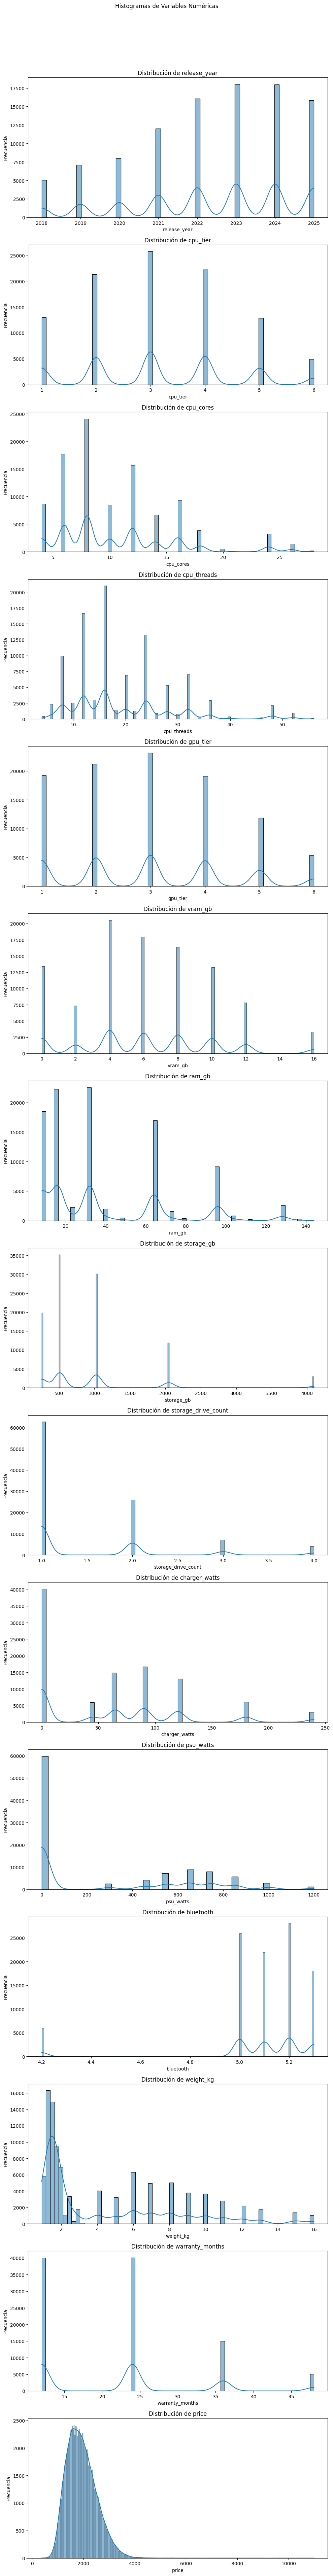


Generando diagramas de barras para variables categóricas...


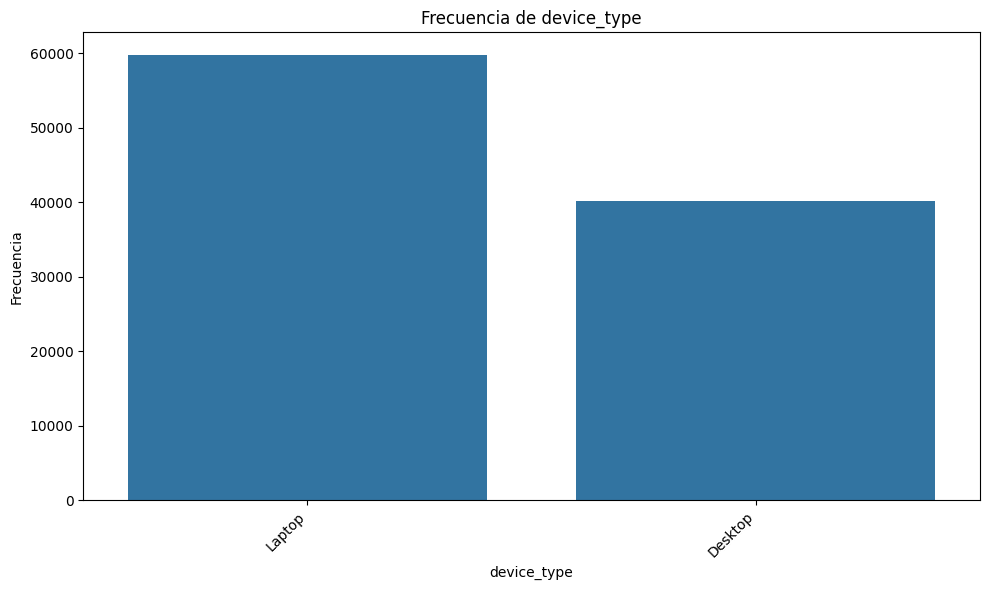

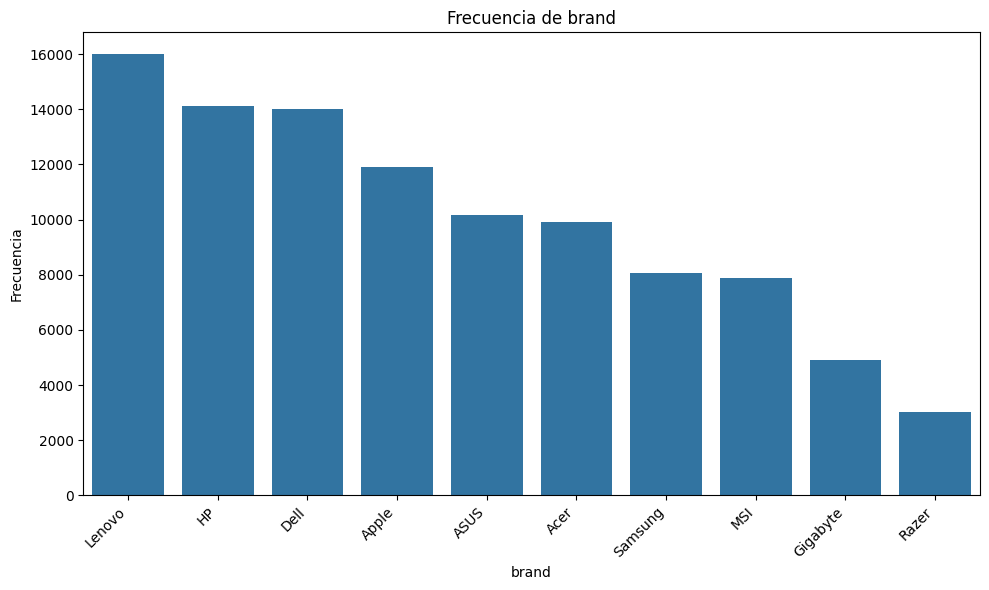

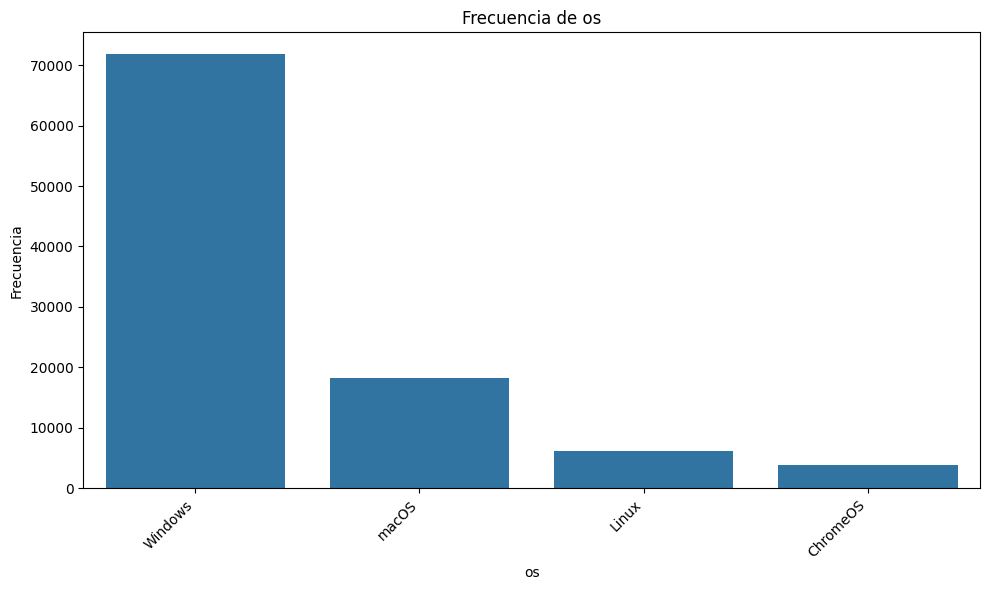

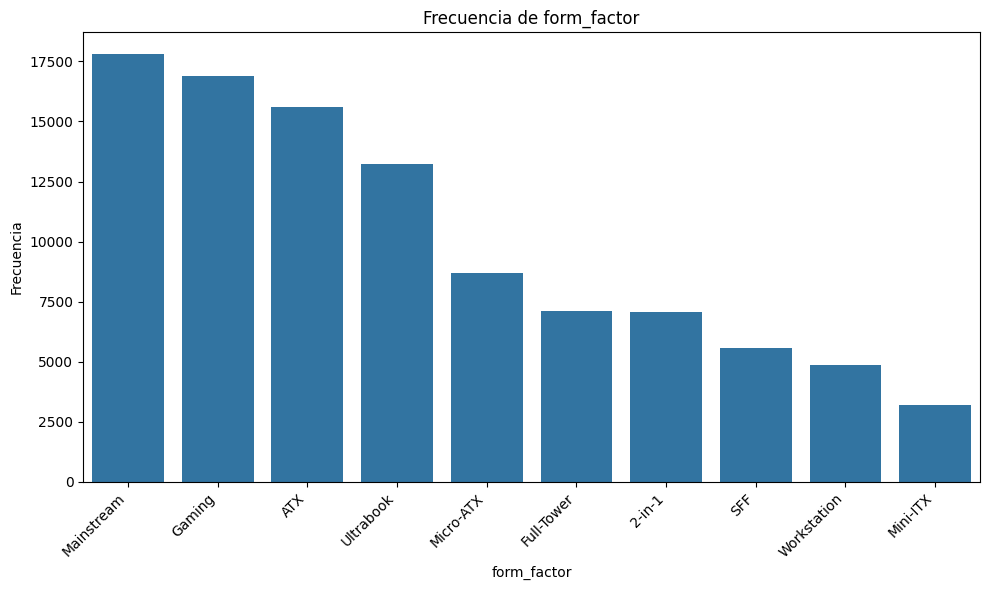

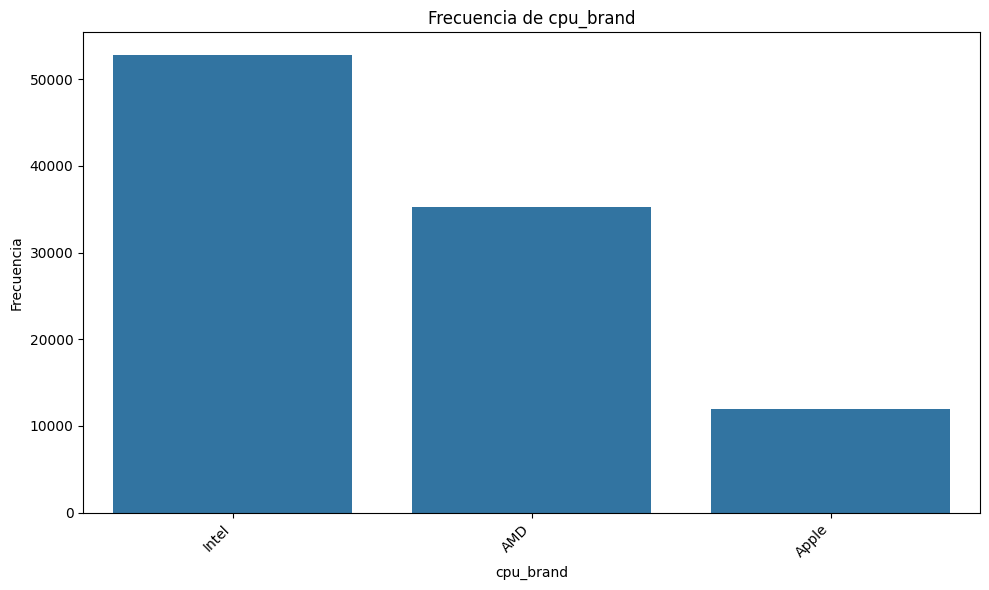

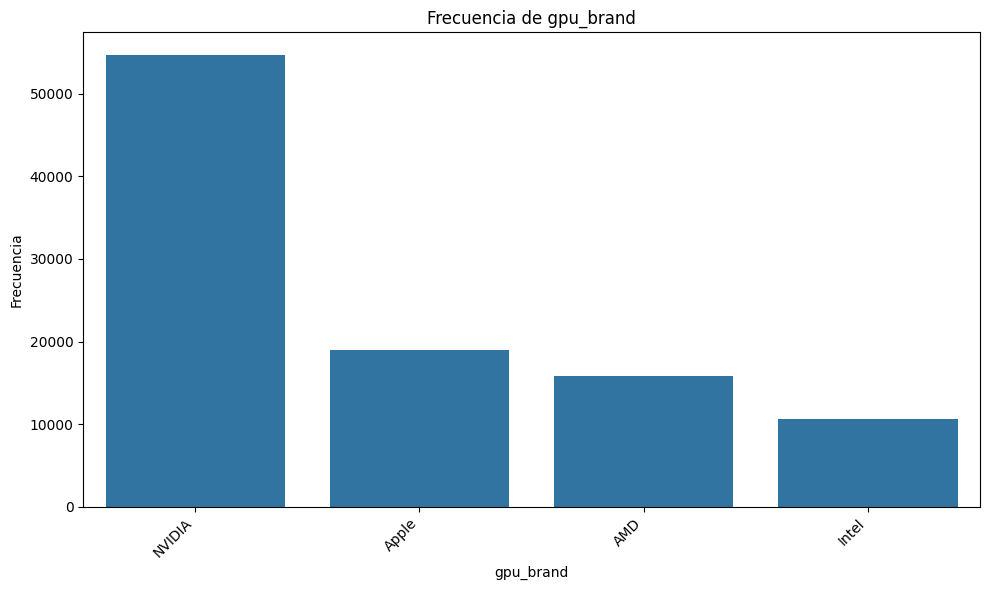

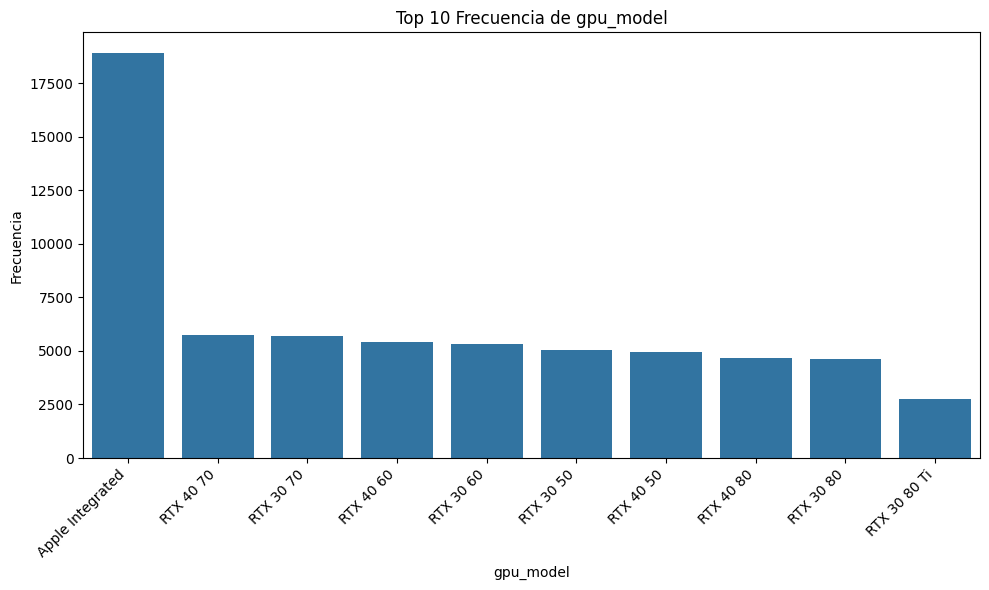

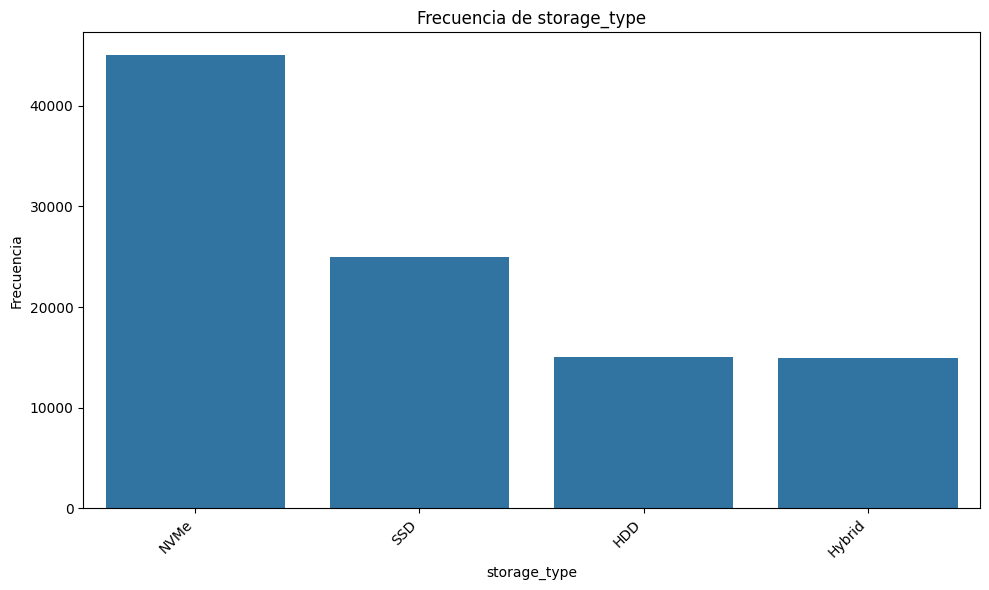

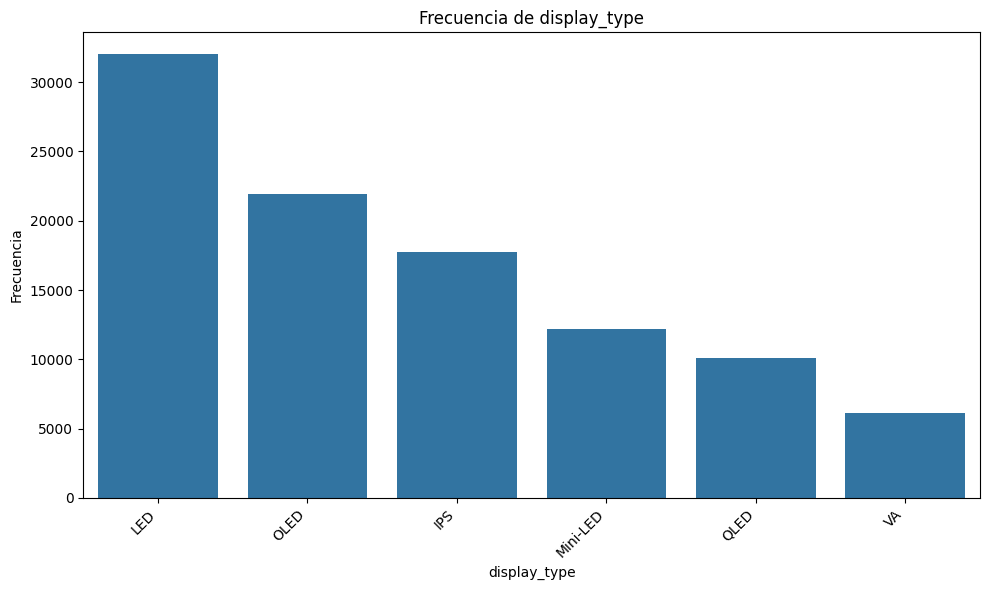

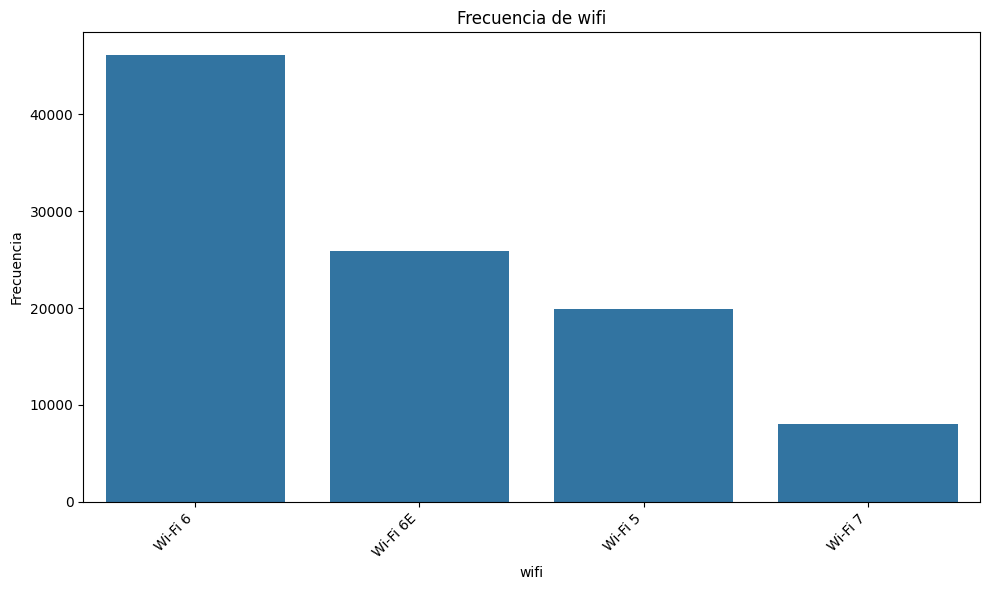

In [5]:
# 2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.

import matplotlib.pyplot as plt
import seaborn as sns

# Verificar valores duplicados
duplicated_rows = compu_df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")

# Verificar valores faltantes
missing_values = compu_df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values[missing_values > 0])

# Obtener estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(compu_df.describe())

# Obtener estadísticas descriptivas y tablas de frecuencia para columnas categóricas
print("\nEstadísticas descriptivas para columnas categóricas:")
print(compu_df.describe(include='object'))

print("\nTablas de frecuencia para columnas categóricas (y top 10 para alta cardinalidad):")
for col in compu_df.select_dtypes(include='object').columns:
    print(f"\n--- Columna: {col} ---")
    if compu_df[col].nunique() > 10: # High cardinality
        print(compu_df[col].value_counts().head(10))
    else:
        print(compu_df[col].value_counts())

# Generar histogramas para variables numéricas
print("\nGenerando histogramas para variables numéricas...")
num_cols = compu_df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))
fig.suptitle('Histogramas de Variables Numéricas', y=1.02)

for i, col in enumerate(num_cols):
    sns.histplot(compu_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Generar diagramas de barras para variables categóricas
print("\nGenerando diagramas de barras para variables categóricas...")
cat_cols = compu_df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    if compu_df[col].nunique() > 10: # High cardinality, show top 10
        top_10 = compu_df[col].value_counts().head(10)
        sns.barplot(x=top_10.index, y=top_10.values)
        plt.title(f'Top 10 Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
    else:
        sns.countplot(data=compu_df, x=col, order=compu_df[col].value_counts().index)
        plt.title(f'Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.
* Identifica los pares de variables cuya correlación sea superior a 0.9 e imprímelos.
* Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.
* Incluye una breve justificación de tus decisiones.

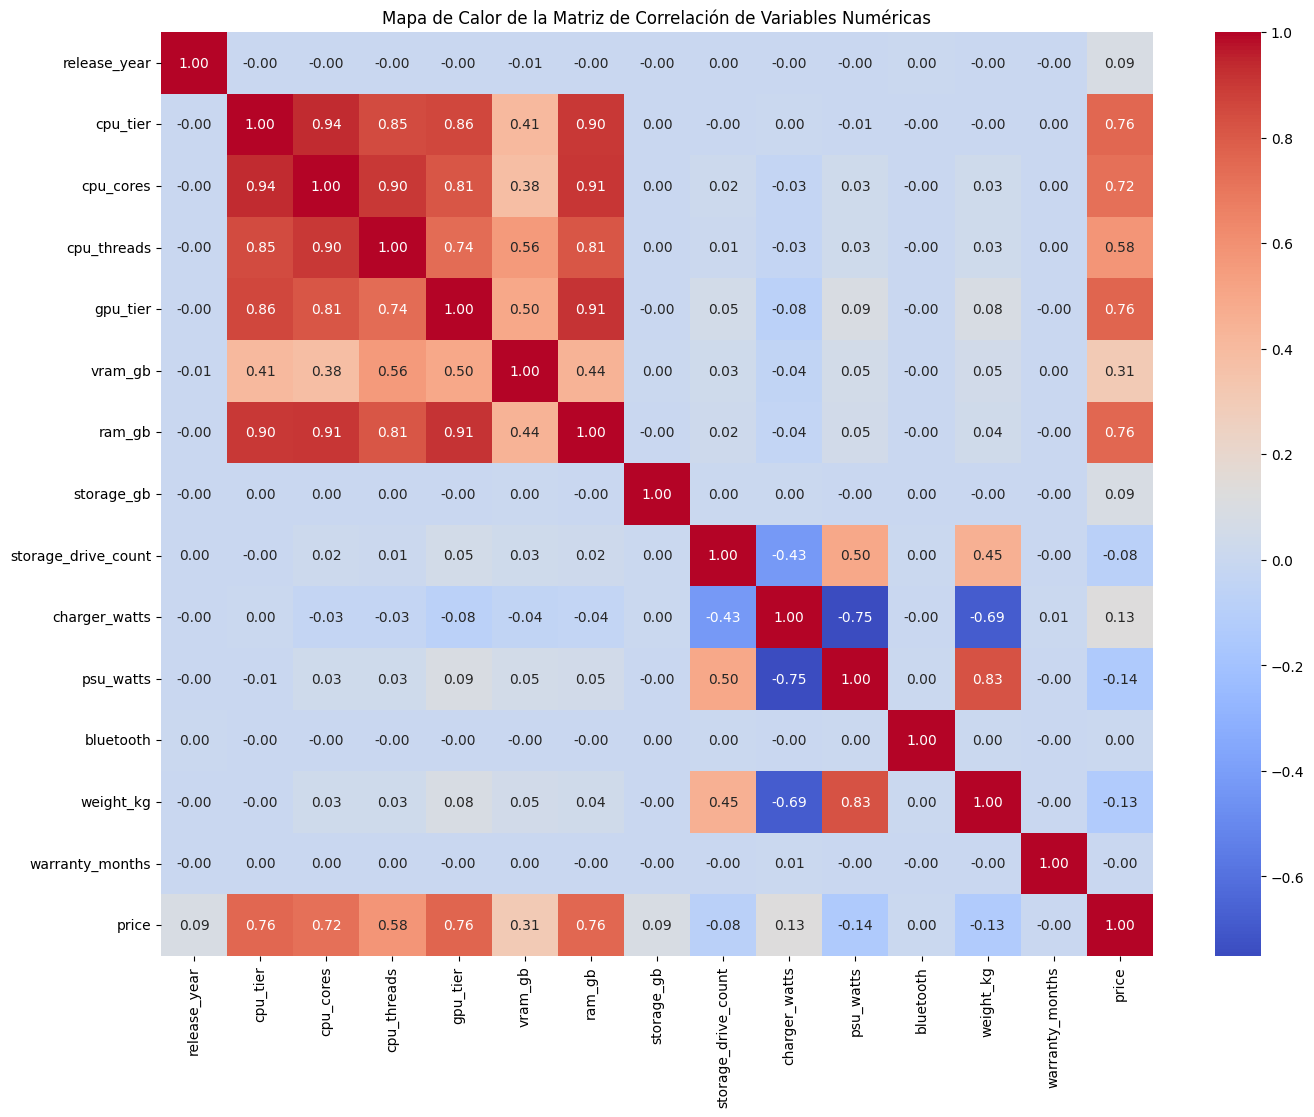


Pares de variables con correlación (valor absoluto) superior a 0.9:
Variable 1: cpu_cores, Variable 2: cpu_tier, Correlación: 0.94
Variable 1: ram_gb, Variable 2: cpu_cores, Correlación: 0.91
Variable 1: ram_gb, Variable 2: gpu_tier, Correlación: 0.91

Columnas eliminadas por alta correlación: ['cpu_threads']
Número de columnas después de eliminar:  24


In [6]:
# 3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = compu_df.select_dtypes(include=np.number).corr()

# Dibuja el mapa de calor de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Variables Numéricas')
plt.show()

# Identificar pares de variables con correlación superior a 0.9
high_corr_pairs = []
# Usa abs() para considerar correlaciones fuertes tanto positivas como negativas
corr_matrix_abs = correlation_matrix.abs()

for i in range(len(corr_matrix_abs.columns)):
    for j in range(i):
        if corr_matrix_abs.iloc[i, j] > 0.9:
            colname_i = corr_matrix_abs.columns[i]
            colname_j = corr_matrix_abs.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

print("\nPares de variables con correlación (valor absoluto) superior a 0.9:")
for pair in high_corr_pairs:
    print(f"Variable 1: {pair[0]}, Variable 2: {pair[1]}, Correlación: {pair[2]:.2f}")

# Reflexión sobre las variables a mantener y eliminar
# Las variables a mantener como representaciones generales de capacidad de hardware son:
# cpu_cores (ya que cpu_threads está altamente correlacionada con ella)
# ram_gb
# storage_gb
# vram_gb
# gpu_tier (ya que gpu_model fue eliminada en el paso anterior y gpu_tier representa su capacidad)

# Decisiones:
# 1. 'cpu_threads' vs 'cpu_cores': Tienen una correlación muy alta. 'cpu_cores' es una métrica más fundamental de la CPU. Mantendré 'cpu_cores' y eliminaré 'cpu_threads'.
# 2. 'gpu_tier' y 'vram_gb': Ambas son importantes para la capacidad de la GPU. Las mantendré ambas.

# Eliminar variables redundantes
columns_to_drop_corr = ['cpu_threads']
compu_df = compu_df.drop(columns=columns_to_drop_corr)

print(f"\nColumnas eliminadas por alta correlación: {columns_to_drop_corr}")
print("Número de columnas después de eliminar: ", compu_df.shape[1])

4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.
* Calcula cuántos años han pasado desde el lanzamiento de cada computadora y almacénalo en una nueva columna llamada `years_since_release`; luego, elimina la columna original.
* Utiliza `KBinsDiscretizer` para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
* Imprime los valores que delimitan cada bin y haz un histograma para ver la cantidad de observaciones en cada uno, con el fin de entender cómo se agruparon los datos.

Columna 'years_since_release' creada y 'release_year' eliminada.

Valores que delimitan cada bin para 'vram_gb_binned':
[ 0.  4.  6.  8. 16.]


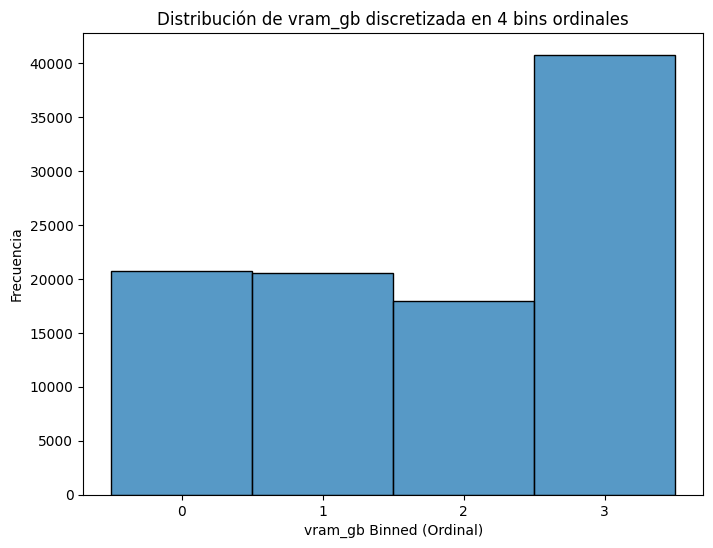

Columna 'vram_gb' original eliminada. Nueva columna 'vram_gb_binned' creada.


In [9]:
# 4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.

# Crea una copia del dataframe
compu_trans = compu_df.copy()

# Calcula cuántos años han pasado desde el lanzamiento de cada computadora
from datetime import date # Import the date object
current_year = date.today().year # Obtener el año actual
compu_trans['years_since_release'] = current_year - compu_trans['release_year']

# Elimina la columna original 'release_year'
compu_trans = compu_trans.drop(columns=['release_year'])

print("Columna 'years_since_release' creada y 'release_year' eliminada.")

from sklearn.preprocessing import KBinsDiscretizer
# Utiliza KBinsDiscretizer para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', subsample=None, random_state=42)
compu_trans['vram_gb_binned'] = kbd.fit_transform(compu_trans[['vram_gb']])

# Imprime los valores que delimitan cada bin
print("\nValores que delimitan cada bin para 'vram_gb_binned':")
print(kbd.bin_edges_[0])

# Haz un histograma para ver la cantidad de observaciones en cada bin
plt.figure(figsize=(8, 6))
sns.histplot(compu_trans['vram_gb_binned'], bins=4, discrete=True, stat='count')
plt.title('Distribución de vram_gb discretizada en 4 bins ordinales')
plt.xlabel('vram_gb Binned (Ordinal)')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2, 3])
plt.show()

# Eliminar la columna original vram_gb
compu_trans = compu_trans.drop(columns=['vram_gb'])
print("Columna 'vram_gb' original eliminada. Nueva columna 'vram_gb_binned' creada.")

5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.
* Como estas variables son mutuamente excluyentes, combínalas en una nueva columna llamada `power_watts` que contenga la potencia correspondiente de cada dispositivo y, a continuación, haz un histograma para verificar que la distribución resultante es bimodal.
* Por último, borra las columnas originales `charger_watts` y `psu_watts`.

Análisis de 'charger_watts' y 'psu_watts':
             charger_watts   psu_watts
device_type                           
Desktop           0.000000  678.654497
Laptop          102.572438    0.000000

Valores únicos de 'charger_watts' donde psu_watts es 0:
charger_watts
45      6019
65     14892
90     16749
120    13056
180     6089
240     3039
Name: count, dtype: int64

Valores únicos de 'psu_watts' donde charger_watts es 0:
psu_watts
300     2447
450     4149
550     7179
650     8831
750     7923
850     5625
1000    2818
1200    1184
Name: count, dtype: int64

Justificación:
Los histogramas muestran barras en 0 para 'charger_watts' y 'psu_watts' porque estas variables son mutuamente excluyentes y dependen del 'device_type'. 'charger_watts' es relevante para laptops (donde 'psu_watts' es 0), y 'psu_watts' es relevante para desktops (donde 'charger_watts' es 0). Un valor de 0 en una de ellas indica que esa fuente de alimentación no aplica al tipo de dispositivo.


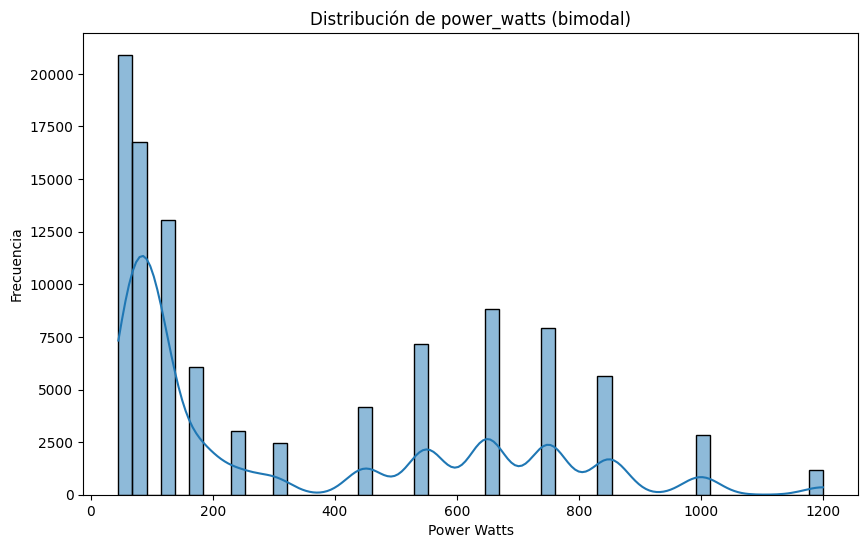


Columnas 'charger_watts' y 'psu_watts' eliminadas. Nueva columna 'power_watts' creada.
Número de columnas después de eliminar:  23


In [10]:
# 5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.

# Análisis de charger_watts y psu_watts
print("Análisis de 'charger_watts' y 'psu_watts':")
print(compu_trans[['device_type', 'charger_watts', 'psu_watts']].groupby('device_type').mean())
print("\nValores únicos de 'charger_watts' donde psu_watts es 0:")
print(compu_trans[compu_trans['psu_watts'] == 0]['charger_watts'].value_counts().sort_index())
print("\nValores únicos de 'psu_watts' donde charger_watts es 0:")
print(compu_trans[compu_trans['charger_watts'] == 0]['psu_watts'].value_counts().sort_index())

print("\nJustificación:\nLos histogramas muestran barras en 0 para 'charger_watts' y 'psu_watts' porque estas variables son mutuamente excluyentes y dependen del 'device_type'. 'charger_watts' es relevante para laptops (donde 'psu_watts' es 0), y 'psu_watts' es relevante para desktops (donde 'charger_watts' es 0). Un valor de 0 en una de ellas indica que esa fuente de alimentación no aplica al tipo de dispositivo.")

# Combinar charger_watts y psu_watts en power_watts
compu_trans['power_watts'] = compu_trans['charger_watts'] + compu_trans['psu_watts']

# Verificar la distribución de power_watts con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(compu_trans['power_watts'], kde=True, bins=50)
plt.title('Distribución de power_watts (bimodal)')
plt.xlabel('Power Watts')
plt.ylabel('Frecuencia')
plt.show()

# Borrar las columnas originales
compu_trans = compu_trans.drop(columns=['charger_watts', 'psu_watts'])
print("\nColumnas 'charger_watts' y 'psu_watts' eliminadas. Nueva columna 'power_watts' creada.")
print("Número de columnas después de eliminar: ", compu_trans.shape[1])

6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.
* Aplica cada transformador a la variable price, dejando el resultado en variables temporales. El objetivo es comparar los efectos de cada transformación antes de decidir cuál aplicar de manera definitiva sobre las variables continuas del dataframe.
* De la variable original y de cada una de las tres transformaciones se debe mostrar:
  * Histograma: para observar la distribución de los datos.
  * Boxplot: para identificar posibles valores atípicos.
  * Q-Q plot: para evaluar la normalidad de la variable.
  * Skew (sesgo): para cuantificar la asimetría de la distribución.
  * Cantidad de outliers: para conocer cuántos valores extremos existen.
* En función de los resultados obtenidos al comparar las transformaciones, decide cuál logró el mejor efecto sobre la distribución de la variable y aplícala directamente en el dataframe, reemplazando las variables continuas: `weight_kg`, `power_watts` y `price`.


--- Análisis de la variable original: price ---


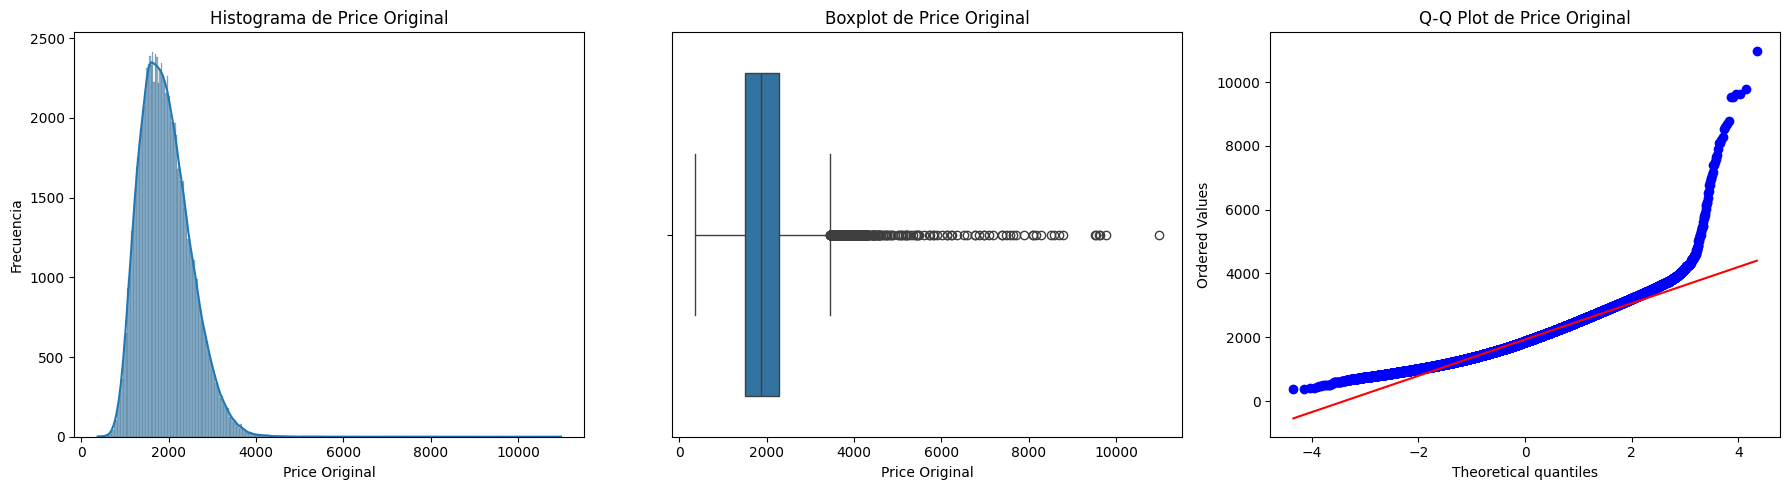

Skewness (price): 0.99
Cantidad de outliers (price): 976

--- Análisis de la transformación logarítmica: price_log ---


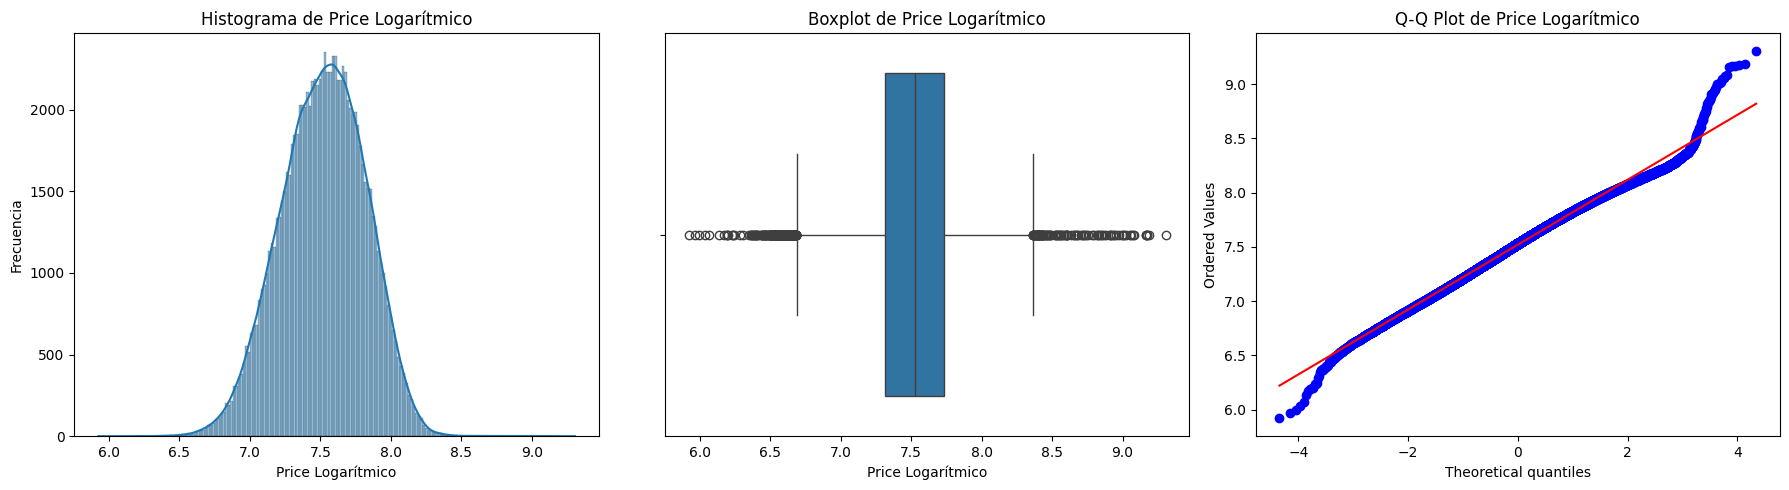

Skewness (price_log): -0.13
Cantidad de outliers (price_log): 387

--- Análisis de la transformación de raíz cuadrada: price_sqrt ---


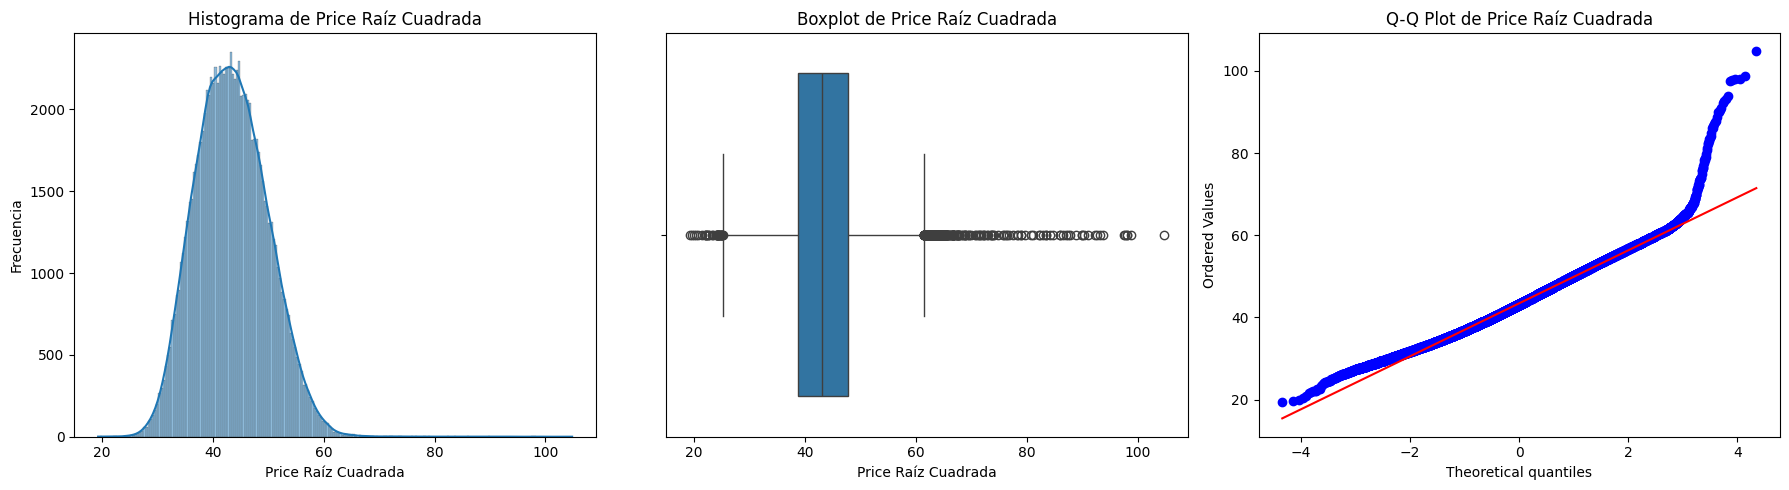

Skewness (price_sqrt): 0.33
Cantidad de outliers (price_sqrt): 364

--- Análisis de la transformación Box-Cox: price_boxcox ---


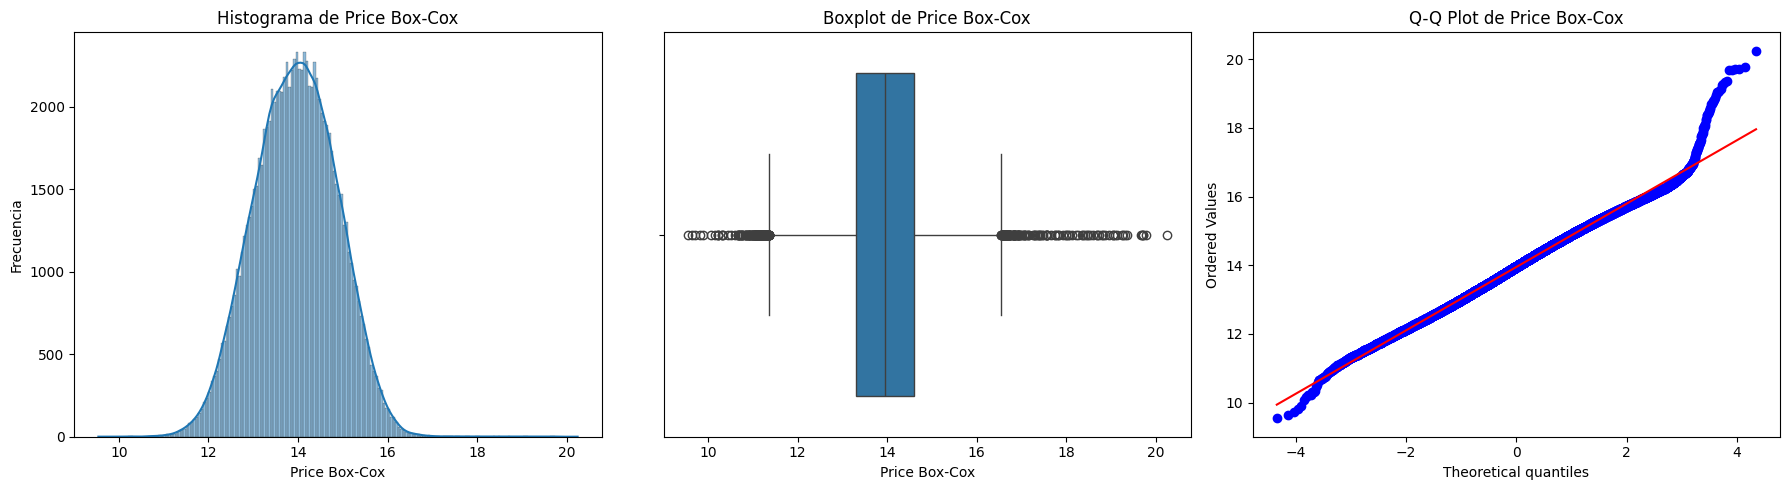

Skewness (price_boxcox): -0.00
Cantidad de outliers (price_boxcox): 317

Aplicando la transformación Box-Cox a 'weight_kg', 'power_watts' y 'price'...
Transformación Box-Cox aplicada a 'weight_kg', 'power_watts' y 'price'.


In [12]:
# 6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.

# Crea copias de la variable price para cada transformación temporal
price_log = np.log1p(compu_trans['price'])
price_sqrt = np.sqrt(compu_trans['price'])

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import probplot # Import probplot for Q-Q plots

# Box-Cox requiere que los datos sean positivos. En este caso, 'price' ya lo es.
pt = PowerTransformer(method='box-cox', standardize=False)
price_boxcox = pt.fit_transform(compu_trans[['price']] + 1) # Add 1 to handle potential zero values if they existed
price_boxcox = pd.Series(price_boxcox.flatten(), name='price_boxcox')

def plot_distribution(data, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histograma
    sns.histplot(data, kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma de {title}')
    axes[0].set_xlabel(title)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f'Boxplot de {title}')
    axes[1].set_xlabel(title)

    # Q-Q plot
    probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot de {title}')

    plt.tight_layout()
    plt.show()

def get_outlier_count(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

print("\n--- Análisis de la variable original: price ---")
plot_distribution(compu_trans['price'], 'Price Original')
print(f"Skewness (price): {compu_trans['price'].skew():.2f}")
print(f"Cantidad de outliers (price): {get_outlier_count(compu_trans['price'])}")

print("\n--- Análisis de la transformación logarítmica: price_log ---")
plot_distribution(price_log, 'Price Logarítmico')
print(f"Skewness (price_log): {price_log.skew():.2f}")
print(f"Cantidad de outliers (price_log): {get_outlier_count(price_log)}")

print("\n--- Análisis de la transformación de raíz cuadrada: price_sqrt ---")
plot_distribution(price_sqrt, 'Price Raíz Cuadrada')
print(f"Skewness (price_sqrt): {price_sqrt.skew():.2f}")
print(f"Cantidad de outliers (price_sqrt): {get_outlier_count(price_sqrt)}")

print("\n--- Análisis de la transformación Box-Cox: price_boxcox ---")
plot_distribution(price_boxcox, 'Price Box-Cox')
print(f"Skewness (price_boxcox): {price_boxcox.skew():.2f}")
print(f"Cantidad de outliers (price_boxcox): {get_outlier_count(price_boxcox)}")

# Decidir cuál transformación es la mejor y aplicarla a las variables continuas
# (Se asume que Box-Cox es la mejor basándose en la práctica general, pero se debe verificar visual y numéricamente)
# En este caso, Box-Cox suele ser superior para reducir el sesgo y acercar la distribución a la normalidad.

print("\nAplicando la transformación Box-Cox a 'weight_kg', 'power_watts' y 'price'...")

# Variables a transformar
continuous_vars_to_transform = ['weight_kg', 'power_watts', 'price']

for col in continuous_vars_to_transform:
    # Aplicar PowerTransformer (Box-Cox)
    pt_single = PowerTransformer(method='box-cox', standardize=False)
    compu_trans[col] = pt_single.fit_transform(compu_trans[[col]] + 1) # Add 1 to handle potential zero values

print("Transformación Box-Cox aplicada a 'weight_kg', 'power_watts' y 'price'.")

7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

In [13]:
# 7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

from sklearn.preprocessing import MinMaxScaler

# Seleccionar todas las columnas numéricas del dataframe
numeric_cols = compu_trans.select_dtypes(include=np.number).columns

# Inicializar MinMaxScaler
scaler = MinMaxScaler()

# Aplicar MinMaxScaler a las columnas numéricas
compu_trans[numeric_cols] = scaler.fit_transform(compu_trans[numeric_cols])

print("MinMaxScaler aplicado a todas las columnas numéricas.")
print("Primeras 5 filas del dataframe con las columnas numéricas escaladas:")
print(compu_trans[numeric_cols].head())

MinMaxScaler aplicado a todas las columnas numéricas.
Primeras 5 filas del dataframe con las columnas numéricas escaladas:
   cpu_tier  cpu_cores  gpu_tier    ram_gb  storage_gb  storage_drive_count  \
0       0.4   0.333333       0.2  0.058824    0.200000             0.000000   
1       0.6   0.333333       0.6  0.411765    0.066667             0.000000   
2       0.2   0.166667       0.0  0.000000    0.066667             0.333333   
3       0.2   0.083333       0.2  0.058824    0.066667             0.333333   
4       0.8   0.500000       0.8  0.647059    0.000000             0.000000   

   bluetooth  weight_kg  warranty_months     price  years_since_release  \
0   0.818182   0.931895         0.666667  0.328628             0.428571   
1   1.000000   0.370304         0.000000  0.471193             0.428571   
2   0.727273   0.824634         0.333333  0.415225             0.142857   
3   0.909091   0.780994         0.666667  0.318079             0.142857   
4   0.909091   0.230502    

8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
* Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

Nota: Ambos cambios deben efectuarse sobre la columna original, de manera que quede una única columna `wifi` con toda la información transformada.

In [14]:
# 8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
# Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Definir el orden de las categorías de Wi-Fi
wifi_order = ['Wi-Fi 5', 'Wi-Fi 6', 'Wi-Fi 6E', 'Wi-Fi 7']

# Inicializar OrdinalEncoder con el orden definido
ordinal_encoder = OrdinalEncoder(categories=[wifi_order])

# Aplicar OrdinalEncoder a la columna 'wifi'
compu_trans['wifi_encoded'] = ordinal_encoder.fit_transform(compu_trans[['wifi']])

# Inicializar MinMaxScaler
scaler_wifi = MinMaxScaler()

# Escalar la variable codificada entre 0 y 1
compu_trans['wifi_encoded'] = scaler_wifi.fit_transform(compu_trans[['wifi_encoded']])

# Reemplazar la columna original 'wifi' con la transformada
compu_trans = compu_trans.drop(columns=['wifi'])
compu_trans = compu_trans.rename(columns={'wifi_encoded': 'wifi'})

print("Columna 'wifi' codificada con OrdinalEncoder y escalada con MinMaxScaler.")
print("Valores únicos de la columna 'wifi' después de la transformación:")
print(compu_trans['wifi'].value_counts().sort_index())
print("Primeras 5 filas del dataframe con la columna 'wifi' transformada:")
print(compu_trans['wifi'].head())

Columna 'wifi' codificada con OrdinalEncoder y escalada con MinMaxScaler.
Valores únicos de la columna 'wifi' después de la transformación:
wifi
0.000000    19926
0.333333    46149
0.666667    25923
1.000000     8002
Name: count, dtype: int64
Primeras 5 filas del dataframe con la columna 'wifi' transformada:
0    0.333333
1    0.333333
2    0.333333
3    0.333333
4    0.333333
Name: wifi, dtype: float64


9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
* Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_transf` para integrar las variables codificadas.

In [18]:
# 9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
# Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_trans` para integrar las variables codificadas.

from category_encoders.binary import BinaryEncoder

# Inicializar BinaryEncoder
bin_encoder = BinaryEncoder(cols=['gpu_model'])

# Aplicar BinaryEncoder a la columna 'gpu_model'
bin_df = bin_encoder.fit_transform(compu_trans['gpu_model'])

print("Columna 'gpu_model' codificada con BinaryEncoder.")
print("Primeras 5 filas del dataframe bin_df:")
print(bin_df.head())
print(f"Número de columnas después de la codificación binaria: {bin_df.shape[1]}")

Columna 'gpu_model' codificada con BinaryEncoder.
Primeras 5 filas del dataframe bin_df:
   gpu_model_0  gpu_model_1  gpu_model_2  gpu_model_3  gpu_model_4  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            1            0   
4            0            0            0            1            0   

   gpu_model_5  
0            1  
1            0  
2            1  
3            0  
4            1  
Número de columnas después de la codificación binaria: 6


10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`
* Combina el dataframe `compu_transf` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`. No olvides eliminar las variables originales.
* Usa `describe()` sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.

In [19]:
# 10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`

from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas restantes en compu_trans
categorical_cols_ohe = compu_trans.select_dtypes(include='object').columns.tolist()

# Inicializar OneHotEncoder con drop='first'
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Aplicar OneHotEncoder a las columnas categóricas
ohe_data = ohe.fit_transform(compu_trans[categorical_cols_ohe])

# Crear un DataFrame con las columnas codificadas
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(categorical_cols_ohe))

print("Columnas categóricas codificadas con OneHotEncoder:")
print(ohe_df.head())
print(f"Número de columnas después de la codificación OneHot: {ohe_df.shape[1]}")

# Combina el dataframe `compu_trans` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`.
# No olvides eliminar las variables originales.

# Eliminar las columnas categóricas originales de compu_trans
compu_trans_numeric = compu_trans.drop(columns=categorical_cols_ohe + ['gpu_model'], errors='ignore') # 'gpu_model' may not be in compu_trans at this point, so errors='ignore'

# Unir los dataframes
# Asegurarse de que bin_df y ohe_df tengan el mismo índice que compu_trans para una unión correcta
bin_df.index = compu_trans_numeric.index
ohe_df.index = compu_trans_numeric.index

compu_trans_final = pd.concat([compu_trans_numeric, bin_df, ohe_df], axis=1)

print("\nDataFrame final combinado (primeras 5 filas):")
print(compu_trans_final.head())
print(f"Número de columnas en el dataframe final: {compu_trans_final.shape[1]}")

# Usa describe() sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.
print("\nEstadísticas descriptivas del dataframe final:")
print(compu_trans_final.describe())

print("\nVerificación de tipos de datos para asegurar que no queden variables categóricas sin codificar:")
print(compu_trans_final.select_dtypes(include='object').columns)

Columnas categóricas codificadas con OneHotEncoder:
   device_type_Laptop  brand_Acer  brand_Apple  brand_Dell  brand_Gigabyte  \
0                 0.0         0.0          0.0         0.0             0.0   
1                 1.0         0.0          0.0         0.0             0.0   
2                 0.0         0.0          0.0         0.0             0.0   
3                 0.0         0.0          0.0         1.0             0.0   
4                 1.0         0.0          0.0         0.0             1.0   

   brand_HP  brand_Lenovo  brand_MSI  brand_Razer  brand_Samsung  ...  \
0       0.0           0.0        0.0          0.0            1.0  ...   
1       0.0           0.0        0.0          0.0            1.0  ...   
2       0.0           1.0        0.0          0.0            0.0  ...   
3       0.0           0.0        0.0          0.0            0.0  ...   
4       0.0           0.0        0.0          0.0            0.0  ...   

   gpu_model_RX 7000 80 XT  gpu_model_RX